<a href="https://colab.research.google.com/github/prabhaM07/intern/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
house_data = pd.read_csv('/content/data.csv')

Handling Missing values

In [ ]:
house_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
house_data.shape

(4600, 18)

Statistical Measures of the dataset

In [ ]:
#house_data.describe ---  house_data.describe()
#The parentheses () are used to invoke the method

house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


UnderStanding the Correlation between variouse features in the dataset

Correlation in machine learning is a statistical measure that describes the extent to which two variables change together.

In [ ]:
cor=house_data.corr()
cor

<ipython-input-36-6bcc8c84296c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=house_data.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


<Axes: >

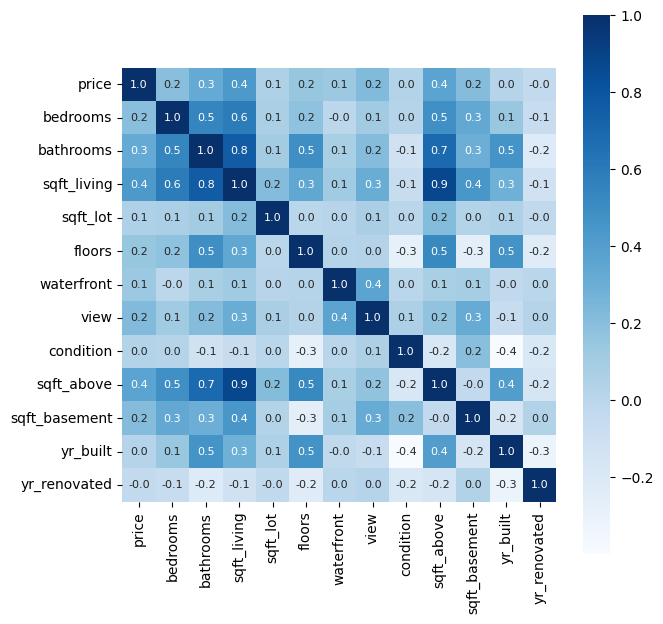

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cor,cbar=True,fmt='.1f',square=True,annot=True,annot_kws={'size':8},cmap='Blues',linecolor="red")

In [ ]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
categorical_columns = house_data.select_dtypes(include=['object']).columns
categorical_data = house_data[categorical_columns]

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    house_data[column] = label_encoder.fit_transform(house_data[column])

In [ ]:
x=house_data.drop(['price'],axis=1)
y=house_data['price']

In [ ]:
# Train and Test Dataset Split #

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(4600, 17) (3680, 17) (920, 17)
(4600,) (3680,) (920,)


In [ ]:
# Train the Model #

Linear Regression

In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

predicted_train = model.predict(x_train)

score1_train = metrics.r2_score(y_train, predicted_train)
score2_train = metrics.mean_absolute_error(y_train, predicted_train)

print("Training Set - R Squared Error:", score1_train)
print("Training Set - Mean Absolute Error:", score2_train)

predicted_test = model.predict(x_test)

score1_test = metrics.r2_score(y_test, predicted_test)
score2_test = metrics.mean_absolute_error(y_test, predicted_test)

print("\nTest Set - R Squared Error:", score1_test)
print("Test Set - Mean Absolute Error:", score2_test)

Training Set - R Squared Error: 0.4155967089429575
Training Set - Mean Absolute Error: 162643.9351179987

Test Set - R Squared Error: 0.05716157252663301
Test Set - Mean Absolute Error: 191585.5676141693


Gradient boosting regressor

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, n_estimators=3)

model.fit(x_train, y_train)

predicted = model.predict(x_train)

score1 = metrics.r2_score(y_train, predicted)

score2 = metrics.mean_absolute_error(y_train, predicted)

print("R Squared Error:", score1)
print("Mean Absolute Error:", score2)

predicted_test = model.predict(x_test)

score1_test = metrics.r2_score(y_test, predicted_test)

score2_test = metrics.mean_absolute_error(y_test, predicted_test)

print("\nTest Set - R Squared Error:", score1_test)
print("Test Set - Mean Absolute Error:", score2_test)

R Squared Error: 0.352366294314174
Mean Absolute Error: 202701.12444532829

Test Set - R Squared Error: 0.030798186624094392
Test Set - Mean Absolute Error: 240418.08710796465


Decision tree regression

In [ ]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

predicted_train = model.predict(x_train)

score1_train = metrics.r2_score(y_train, predicted_train)
score2_train = metrics.mean_absolute_error(y_train, predicted_train)

print("Training Set - R Squared Error:", score1_train)
print("Training Set - Mean Absolute Error:", score2_train)

predicted_test = model.predict(x_test)

score1_test = metrics.r2_score(y_test, predicted_test)
score2_test = metrics.mean_absolute_error(y_test, predicted_test)

print("\nTest Set - R Squared Error:", score1_test)
print("Test Set - Mean Absolute Error:", score2_test)

Training Set - R Squared Error: 1.0
Training Set - Mean Absolute Error: 0.0

Test Set - R Squared Error: -0.03938683256013675
Test Set - Mean Absolute Error: 204087.54244544674


Random forest regression

In [ ]:
model = RandomForestRegressor()

model.fit(x_train, y_train)

predicted_train = model.predict(x_train)

score1_train = metrics.r2_score(y_train, predicted_train)
score2_train = metrics.mean_absolute_error(y_train, predicted_train)

print("Training Set - R Squared Error:", score1_train)
print("Training Set - Mean Absolute Error:", score2_train)

predicted_test = model.predict(x_test)

score1_test = metrics.r2_score(y_test, predicted_test)
score2_test = metrics.mean_absolute_error(y_test, predicted_test)

print("\nTest Set - R Squared Error:", score1_test)
print("Test Set - Mean Absolute Error:", score2_test)


Training Set - R Squared Error: 0.9084175267876825
Training Set - Mean Absolute Error: 47735.39602824592

Test Set - R Squared Error: 0.040271211758125536
Test Set - Mean Absolute Error: 159243.40967811405
